In [1]:
import wget
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import http.client
import urllib.parse
import wget
import urllib3
import urllib.request

/Users/alexeygilman/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def download_if_needed(url,filename):
    """
    if file isnt on the computer in pwd, this will download or
    tell you that it already exists
    """
    if os.path.exists(filename):
        print(filename, "already exists")
    else:
        print("downloading", filename)
        wget.download(url)

        
        
def get_pronto_data():
    """
    The download if needed function specific for the pronto data url
    """

    download_if_needed("https://s3.amazonaws.com/pronto-data/open_data_year_one.zip",
                       "open_data_year_one.zip")
    
def get_trip_data():
    """
    returns dataframe of the trip data csv from zipfile without extraction
    """
    get_pronto_data()
    zf = zipfile.ZipFile("open_data_year_one.zip")
    file_handle = zf.open("2015_trip_data.csv")
    return pd.read_csv(file_handle)


def get_weather_data():
    """
    returns weather data from the pronto csv file
    """
    get_pronto_data()
    zf = zipfile.ZipFile("open_data_year_one.zip")
    file_handle = zf.open("2015_weather_data.csv")
    return pd.read_csv(file_handle)



def joined_weather_and_trips():

    """
    Cleaning and joining both the trips and weather data
    """
    #accessing trips and weather data

    trips = get_trip_data()
    weather = get_weather_data()

    #setting the index of trips

    trip_times = pd.DatetimeIndex(trips["starttime"])
    trips.index = trip_times.date

    # A pivot table is a two dimensional array
    datetime = pd.DatetimeIndex(trips["starttime"])
    trips_by_day = trips.pivot_table("trip_id", index = datetime.date,
                                     columns = "usertype", aggfunc = "count" )


    #cleaning up weather and setting index

    weather = weather.iloc[:-1]
    weather_times = pd.DatetimeIndex(weather["Date"])
    weather.index = weather_times.date

    #joining trips and weather data
    return weather.join(trips_by_day)


In [ ]:
def ploting_joined_totals():
    data = joined_weather_and_trips()
    fig, ax = plt.subplots(2, figsize = (14,6), sharex = True)
    data["Annual Member"].plot(ax = ax[0], title = "Annual Member")
    data["Short-Term Pass Holder"].plot(ax = ax[1], title = "Short Term Pass Holder")
    fig.savefig("daily_totals.png")
    return 9 #if plot succesful return 9 for unittest



In [43]:
def plot_x_vs_y():
    """
    Allows user to choose desired x and y axis and then generates a plot. Creates a .pdf file of the plot. 
    """
    data = joined_weather_and_trips()
    argument_y = str(input("Enter your choice of data for y axis from the following options: Mean_Temperature_F, Precipitation_In, Annual Member, Short-Term Pass Holder"))
    argument_x = str(input("Enter your choice of data for x axis from the following options: Date, Mean_Temperature_F, Precipitation_In, Annual Member, Short-Term Pass Holder"))
    if argument_x == "Date":
        plt.scatter(data.index, data[argument_y])
        plt.xlabel("Date")
        plt.ylabel(argument_y)
        plt.savefig("plot.pdf")
    else: 
        plt.scatter(data[argument_x],data[argument_y])
        plt.xlabel(argument_x)
        plt.ylabel(argument_y)
        plt.savefig("plot.pdf")

open_data_year_one.zip already exists
open_data_year_one.zip already exists
Enter your choice of data for y axis from the following options: Mean_Temperature_F, Precipitation_In, Annual Member, Short-Term Pass HolderAnnual Member
Enter your choice of data for x axis from the following options: Date, Mean_Temperature_F, Precipitation_In, Annual Member, Short-Term Pass HolderDate


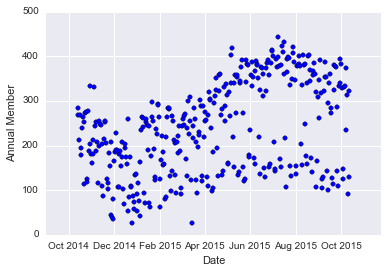

In [44]:
plotting()

In [7]:
data = joined_weather_and_trips()
plt.plot(data["Annual Member"])

open_data_year_one.zip already exists
open_data_year_one.zip already exists


In [8]:
%matplotlib inline

In [10]:
data.head(2)

,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,...,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events,Annual Member,Short-Term Pass Holder
2014-10-13,10/13/2014,71,62,54,55,51,46,87,68,46,...,10,10,4,13,4,21,0.00,Rain,284,125
2014-10-14,10/14/2014,63,59,55,52,51,50,88,78,63,...,10,9,3,10,5,17,0.11,Rain,268,223


In [12]:
data.columns

Index(['Date', 'Max_Temperature_F', 'Mean_Temperature_F', 'Min_TemperatureF',
       'Max_Dew_Point_F', 'MeanDew_Point_F', 'Min_Dewpoint_F', 'Max_Humidity',
       'Mean_Humidity ', 'Min_Humidity ', 'Max_Sea_Level_Pressure_In ',
       'Mean_Sea_Level_Pressure_In ', 'Min_Sea_Level_Pressure_In ',
       'Max_Visibility_Miles ', 'Mean_Visibility_Miles ',
       'Min_Visibility_Miles ', 'Max_Wind_Speed_MPH ', 'Mean_Wind_Speed_MPH ',
       'Max_Gust_Speed_MPH', 'Precipitation_In ', 'Events', 'Annual Member',
       'Short-Term Pass Holder'],
      dtype='object')

In [19]:
data.rows()

AttributeError: 'DataFrame' object has no attribute 'rows'